<a href="https://colab.research.google.com/github/bmines/Projects/blob/master/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("/content/titanic-passengers.csv", sep = ";")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
dataset = preprocess_data(data)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


"Name", "Cabin", "Ticket", "Embarked" cannot be used

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis = 1)
y = data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

tr = tree.DecisionTreeClassifier()
tr.fit(x_train, y_train)
y_pred = tr.predict(x_test)

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7430167597765364


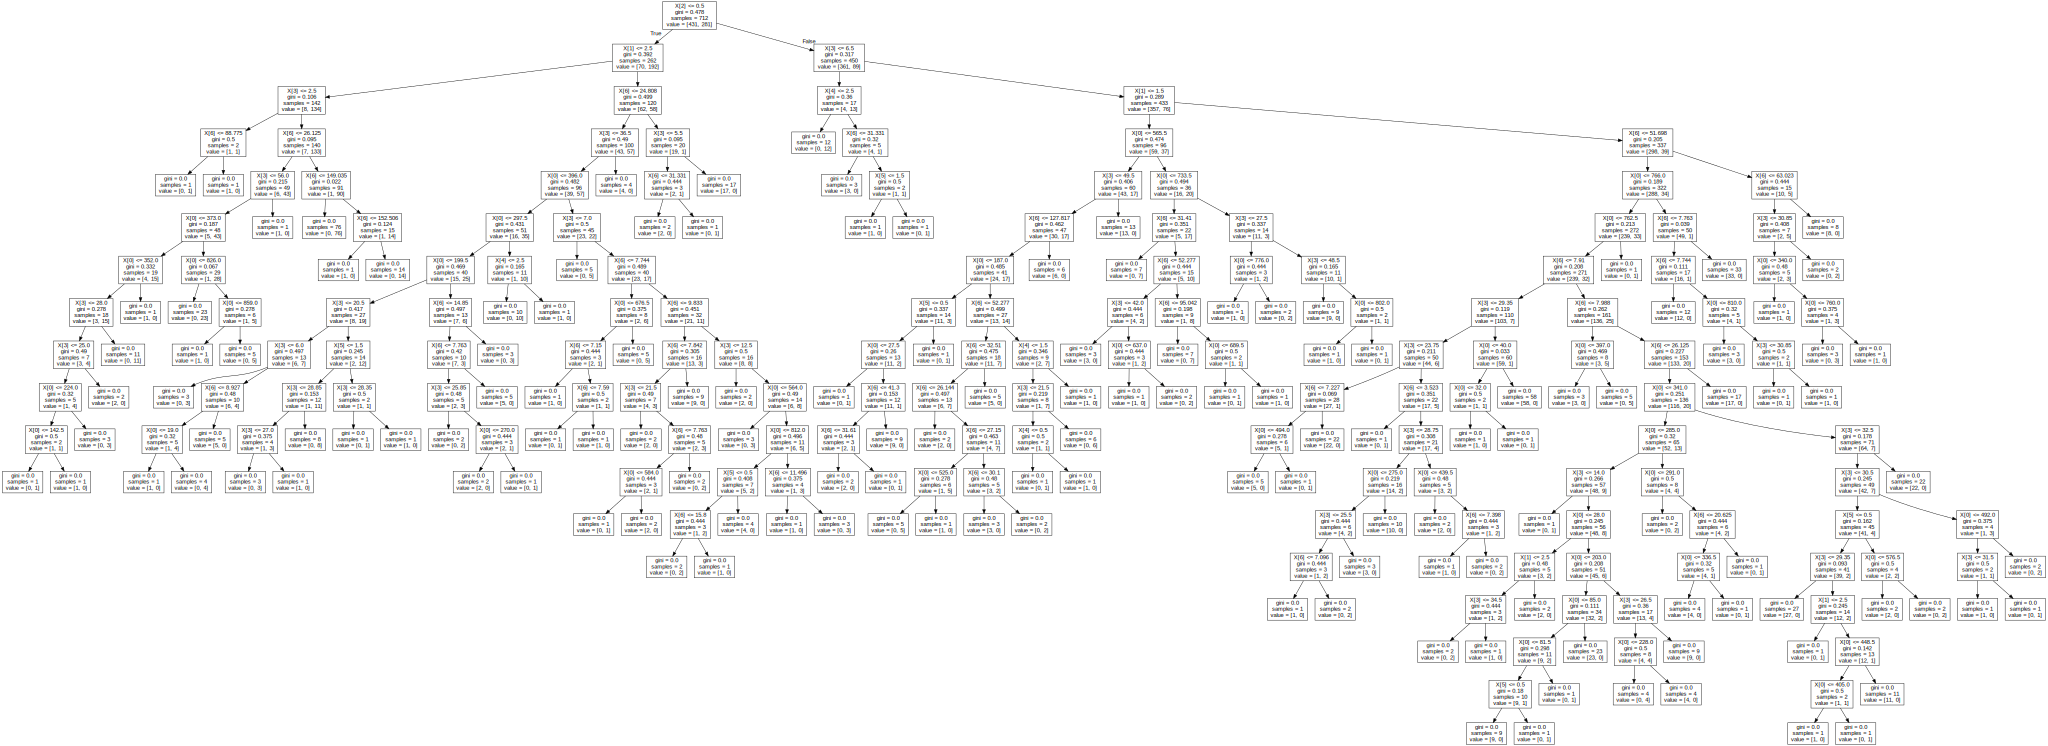

In [4]:
import graphviz
dot_data = tree.export_graphviz(tr, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("dataset")
graph

In [5]:
df = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 4)

In [6]:
df.fit(x_train, y_train)
y_pred = df.predict(x_test)

print("score : {}".format(accuracy_score(y_test, y_pred)))

score : 0.8435754189944135


In [7]:
#better result

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)
print("score : {}".format(accuracy_score(y_test , y_pred2)))

score : 0.8435754189944135


In [9]:
#better results